In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

2021-12-07 21:21:46.465648: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/apps/easybuild/stacks/2021a/software/Python/3.9.5-GCCcore-10.3.0/lib:/opt/apps/easybuild/stacks/2021a/software/libffi/3.3-GCCcore-10.3.0/lib64:/opt/apps/easybuild/stacks/2021a/software/GMP/6.2.1-GCCcore-10.3.0/lib:/opt/apps/easybuild/stacks/2021a/software/SQLite/3.35.4-GCCcore-10.3.0/lib:/opt/apps/easybuild/stacks/2021a/software/Tcl/8.6.11-GCCcore-10.3.0/lib:/opt/apps/easybuild/stacks/2021a/software/libreadline/8.1-GCCcore-10.3.0/lib:/opt/apps/easybuild/stacks/2021a/software/ncurses/6.2-GCCcore-10.3.0/lib:/opt/apps/easybuild/stacks/2021a/software/binutils/2.36.1-GCCcore-10.3.0/lib:/opt/apps/easybuild/stacks/2021a/software/libarchive/3.5.1-GCCcore-10.3.0/lib:/opt/apps/easybuild/stacks/2021a/software/XZ/5.2.5-GCCcore-10.3.0/lib:/opt/apps/e

In [ ]:
N = 16

In [2]:
work_dir = "./"
data_dir = "./data/Ising%d/"%(N)
model_dir = "./model/"

# 1. Load data

In [3]:
sym_beta = np.arange(0.32,0.41,0.01)
bsym_beta = np.arange(0.47,0.56,0.01)

sym_conf = []
bsym_conf = []

# N = 16
input_shape = (N,N,1)

for beta in sym_beta:
    conf_name = 'Ising_b%0.3fN%d' %(beta,N)
    conf = np.load(data_dir+conf_name+'.npy')
    sym_conf.append(conf)

for beta in bsym_beta:
    conf_name = 'Ising_b%0.3fN%d' %(beta,N)
    conf = np.load(data_dir+conf_name+'.npy')
    bsym_conf.append(conf)

print("sym conf :",np.shape(sym_conf),"bsym conf :",np.shape(bsym_conf))

sym conf : (9, 1000, 16, 16) bsym conf : (10, 1000, 16, 16)


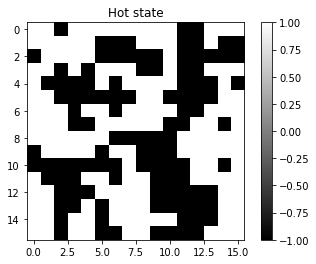

In [4]:
plt.title("Hot state")
plt.imshow(sym_conf[0][0],cmap='gray',vmin=-1,vmax=1)
plt.colorbar()

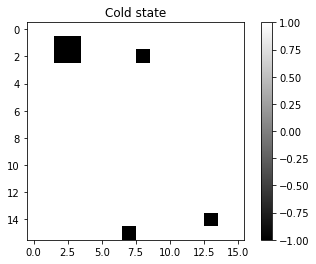

In [5]:
plt.title("Cold state")
plt.imshow(bsym_conf[0][0],cmap='gray',vmin=-1,vmax=1)
plt.colorbar()

In [6]:
x = []
y = []
for i in range(len(sym_conf)):
    for j in range(len(sym_conf[i])):
        x.append(sym_conf[i][j])
        y.append(0)
for i in range(len(bsym_conf)):
    for j in range(len(bsym_conf[i])):
        x.append(bsym_conf[i][j])
        y.append(1)
np.shape(x), np.shape(y)

((19000, 16, 16), (19000,))

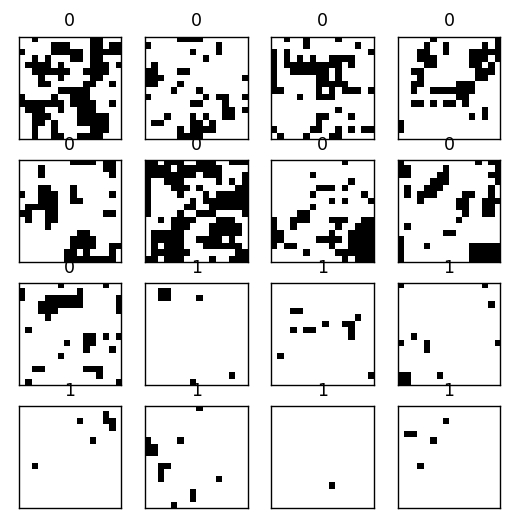

In [7]:
fig, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))
for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].set_title(str(y[ind*1000]), fontsize=10)
        ax[i,j].imshow(x[ind*1000], vmin=-1, vmax=1, cmap='gray')
        ax[i,j].axes.xaxis.set_visible(False)
        ax[i,j].axes.yaxis.set_visible(False)
    
plt.show()

# 2. Preprocessing

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1234, test_size=0.4, shuffle=True)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

In [9]:
print(np.shape(x_train), np.shape(x_test))

(11400, 16, 16, 1) (7600, 16, 16, 1)


In [10]:
print(np.shape(y_train), np.shape(y_test))

(11400, 2) (7600, 2)


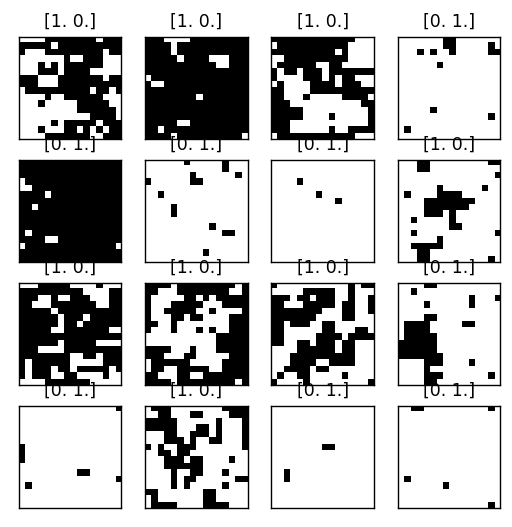

In [11]:
fig, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))
for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].set_title(str(y_train[ind]), fontsize=10)
        ax[i,j].imshow(x_train[ind], vmin=-1, vmax=1, cmap='gray')
        ax[i,j].axes.xaxis.set_visible(False)
        ax[i,j].axes.yaxis.set_visible(False)
    
plt.show()

# 3. Model traning

In [14]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(filters=64, kernel_size=(2,2), strides=2, activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.25), # Not in the original paper
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.25), # Not in the original paper
        keras.layers.Dense(2, activation='softmax'),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 64)          320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 64)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

2021-12-07 21:22:01.665583: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/apps/easybuild/stacks/2021a/software/Python/3.9.5-GCCcore-10.3.0/lib:/opt/apps/easybuild/stacks/2021a/software/libffi/3.3-GCCcore-10.3.0/lib64:/opt/apps/easybuild/stacks/2021a/software/GMP/6.2.1-GCCcore-10.3.0/lib:/opt/apps/easybuild/stacks/2021a/software/SQLite/3.35.4-GCCcore-10.3.0/lib:/opt/apps/easybuild/stacks/2021a/software/Tcl/8.6.11-GCCcore-10.3.0/lib:/opt/apps/easybuild/stacks/2021a/software/libreadline/8.1-GCCcore-10.3.0/lib:/opt/apps/easybuild/stacks/2021a/software/ncurses/6.2-GCCcore-10.3.0/lib:/opt/apps/easybuild/stacks/2021a/software/binutils/2.36.1-GCCcore-10.3.0/lib:/opt/apps/easybuild/stacks/2021a/software/libarchive/3.5.1-GCCcore-10.3.0/lib:/opt/apps/easybuild/stacks/2021a/software/XZ/5.2.5-GCCcore-10.3.0/lib:/opt/apps/easybuild/s

In [15]:
batch_size = 12
epochs = 20

adam = keras.optimizers.Adam(learning_rate=1e-4,
                             beta_1=0.9,
                             beta_2=0.999,
                             epsilon=1e-07,
                             amsgrad=False,
                            )

model.compile(optimizer=adam, loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
855/855 [==============================] - 2s 2ms/step - loss: 0.2104 - accuracy: 0.9398 - val_loss: 0.0691 - val_accuracy: 0.9833
Epoch 2/20
855/855 [==============================] - 1s 1ms/step - loss: 0.0654 - accuracy: 0.9807 - val_loss: 0.0434 - val_accuracy: 0.9842
Epoch 3/20
855/855 [==============================] - 1s 1ms/step - loss: 0.0492 - accuracy: 0.9856 - val_loss: 0.0384 - val_accuracy: 0.9833
Epoch 4/20
855/855 [==============================] - 1s 1ms/step - loss: 0.0447 - accuracy: 0.9857 - val_loss: 0.0394 - val_accuracy: 0.9868
Epoch 5/20
855/855 [==============================] - 1s 1ms/step - loss: 0.0415 - accuracy: 0.9864 - val_loss: 0.0376 - val_accuracy: 0.9842
Epoch 6/20
855/855 [==============================] - 1s 1ms/step - loss: 0.0418 - accuracy: 0.9862 - val_loss: 0.0386 - val_accuracy: 0.9842
Epoch 7/20
855/855 [==============================] - 1s 1ms/step - loss: 0.0377 - accuracy: 0.9871 - val_loss: 0.0396 - val_accuracy: 0.9860
Epoch 

In [17]:
score = model.evaluate(x_test, y_test, verbose = 0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03729939088225365
Test accuracy: 0.9878947138786316


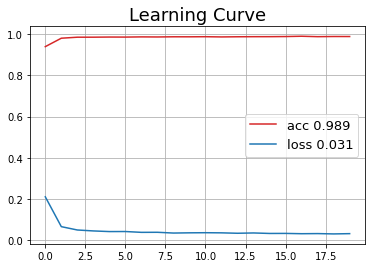

In [19]:
t = range(epochs)

plt.title("Learning Curve", fontsize = 18)
plt.plot(t, history.history['accuracy'], 'C3', label='acc %0.3f'%(history.history['accuracy'][-1]))
plt.plot(t, history.history['loss'], 'C0', label='loss %0.3f'%(history.history['loss'][-1]))
plt.legend(loc='center right', fontsize=13)
plt.grid(True)

In [20]:
# Save model
model_name = 'IsingN16Coldv2'
model.save(model_dir+model_name+'.h5')

In [21]:
model_a = keras.models.load_model(model_dir+model_name+'.h5')

# 4. Model Prediction

## 4.1 Load Data

In [22]:
ext_beta = np.arange(0.428,0.448,0.002)
beta_list = np.concatenate((sym_beta, ext_beta, bsym_beta))

conf = []

N = 16
input_shape = (N,N,1)

for beta in beta_list:
    conf_name = 'Ising_b%0.3fN%d' %(beta,N)
    _conf = np.load(data_dir+conf_name+'.npy')
    conf.append(_conf)

conf = np.expand_dims(conf, -1)

print("conf :",np.shape(conf))

conf : (30, 1000, 16, 16, 1)


## 4.2 Measure the order parameter

In [23]:
# Calculate P_b
result = np.zeros((len(conf),1000))
for i in range(len(conf)):
    result[i] = model.predict(conf[i]).T[1]

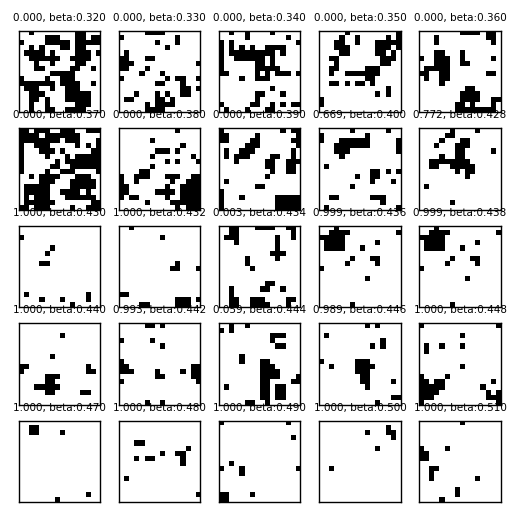

In [24]:
fig, ax = plt.subplots(5,5, dpi=125, figsize=(5,5))
for i in range(5):
    for j in range(5):
        ind = i*5 + j
        ax[i,j].set_title("%.3f, beta:%.3f"%(result[ind][0], beta_list[ind]),fontsize=6)
        ax[i,j].imshow(conf[ind][0], vmin=-1, vmax=1, cmap='gray')
        ax[i,j].axes.xaxis.set_visible(False)
        ax[i,j].axes.yaxis.set_visible(False)
    
plt.show()

In [111]:
O_pred = np.average(result, axis=1)
O_pred_err = np.sqrt(np.var(result, axis=1))

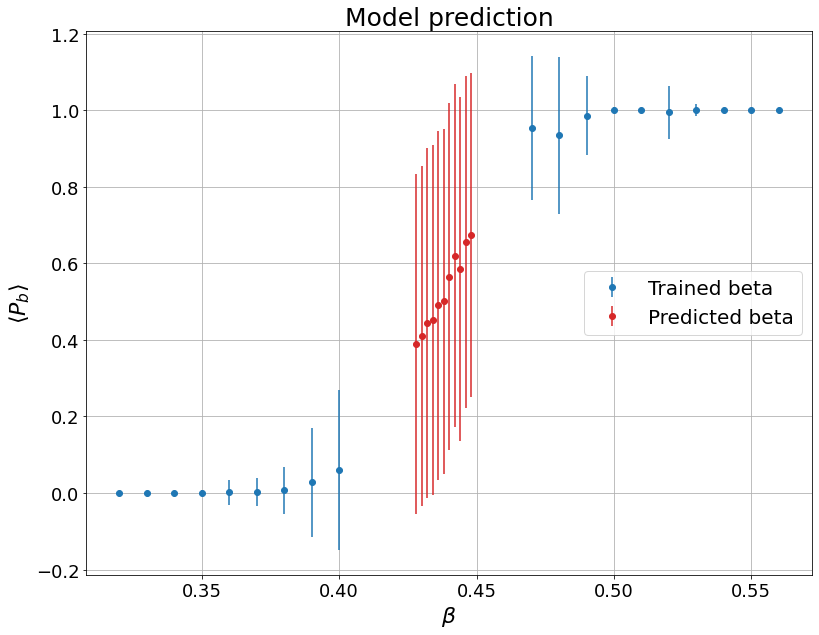

In [122]:
plt.figure(figsize=(13,10))
plt.title("Model prediction",fontsize=25)
plt.errorbar(sym_beta,O_pred[:len(sym_beta)], yerr=O_pred_err[:len(sym_beta)], fmt='C0o', label='Trained beta')
plt.errorbar(ext_beta,O_pred[len(sym_beta):len(sym_beta)+len(ext_beta)], yerr=O_pred_err[len(sym_beta):len(sym_beta)+len(ext_beta)], fmt='C3o', label='Predicted beta')
plt.errorbar(bsym_beta,O_pred[-len(bsym_beta):], yerr=O_pred_err[-len(bsym_beta):],fmt='C0o')
plt.legend(loc='center right', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r"$\beta$", fontsize=22)
plt.ylabel(r"$\langle P_b \rangle$", fontsize=22)
plt.grid(True)

# 5. Histogram reweighting

 We calculate the estimator of an observable $O$ using following equation.  
$$
\langle O \rangle = \frac{\sum_k O_k p_{k}^{-1} e^{-\beta E_k}}{\sum_k p_{k}^{-1} e^{-\beta E_k}}
$$

$p_k$ is some probability distribution used when sampling a configuration at some temperature $\beta_0$.
$$
p_k = \frac{1}{Z_0} e^{-1\beta_0 E_k}
$$
where $Z_0$ is a partition function calcuated at $\beta_0$. Using this estimator, we can approximate the estimator of an observable at $\beta$ which is in vicinity of $\beta_0$. Substituting $p_k$ into the first equation, we get
$$
\langle O \rangle = \frac{\sum_k O_k e^{-(\beta - \beta_0) E_k}}{\sum_k  e^{-(\beta - \beta_0) E_k}}
$$

In [79]:
def calcEnergy(config):
    """Calculate energy density
    """
    energy = 0
    
    for i in range(len(config)):
        for j in range(len(config)):
            s = config[i,j]
            nn = config[(i+1)%N,j] \
            + config[(i-1)%N,j] \
            + config[i,(j+1)%N] \
            + config[i,(j-1)%N]
            energy += -nn*s
    return energy*0.5

exp overflow problem

In [61]:
beta_id = 14
np.shape(conf[beta_id]), beta_list[beta_id]

((1000, 16, 16, 1), 0.438)

In [62]:
O_0 = result[beta_id]
conf_0 = conf[beta_id]
np.shape(O_0), np.shape(conf_0)

((1000,), (1000, 16, 16, 1))

In [86]:
# Reweighted P_b
n_ext = 20 # number of extrapolation point
O_re = np.zeros(n_ext) # extrapolated P_b
beta_exp = np.linspace(beta_list[0],beta_list[-1],n_ext)
beta_0 = beta_list[beta_id] # Parameter chosen for re-weighting
for i in range(n_ext):
    num = 0.
    den = 0.
    for j in range(len(conf_0)):
        num += O_0[j]*np.exp(-(beta_exp[i] - beta_0) * calcEnergy(conf_0[j]))
        den += np.exp(-(beta_exp[i] - beta_0) * calcEnergy(conf_0[j]))
    O_re[i] = num/den

In [87]:
O_re

array([6.40903510e-05, 1.85832719e-04, 5.81004716e-04, 1.86837551e-03,
       5.97789024e-03, 1.84569791e-02, 5.30377755e-02, 1.35249728e-01,
       2.89048831e-01, 4.96986221e-01, 6.95648461e-01, 8.38672977e-01,
       9.23742883e-01, 9.67805506e-01, 9.87836081e-01, 9.95815080e-01,
       9.98646612e-01, 9.99573833e-01, 9.99865425e-01, 9.99956495e-01])

In [97]:
beta_exp

array([0.32      , 0.33263158, 0.34526316, 0.35789474, 0.37052632,
       0.38315789, 0.39578947, 0.40842105, 0.42105263, 0.43368421,
       0.44631579, 0.45894737, 0.47157895, 0.48421053, 0.49684211,
       0.50947368, 0.52210526, 0.53473684, 0.54736842, 0.56      ])

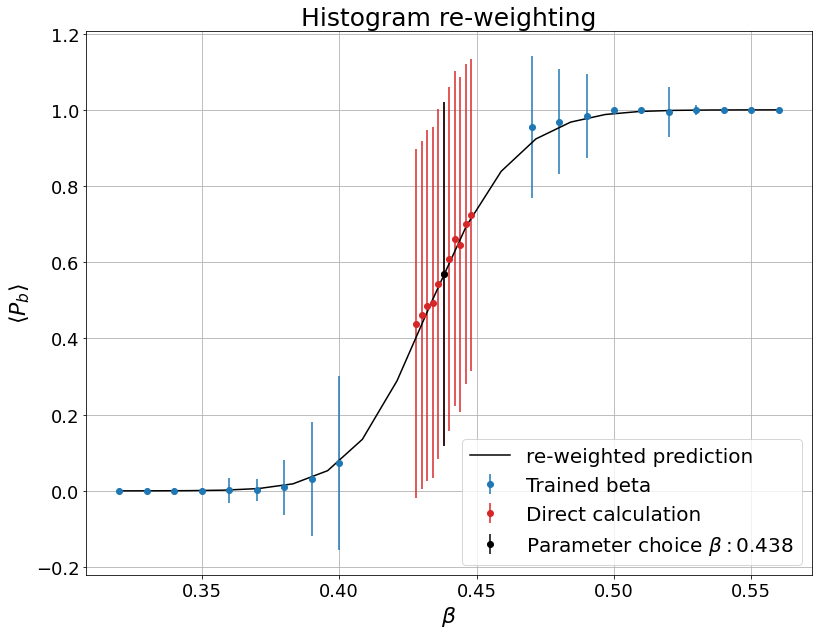

In [100]:
plt.figure(figsize=(13,10))
plt.title("Histogram re-weighting",fontsize=25)

# direct model prediction
plt.errorbar(sym_beta,O_pred[:len(sym_beta)], yerr=O_pred_err[:len(sym_beta)], fmt='C0o', label='Trained beta')
plt.errorbar(ext_beta,O_pred[len(sym_beta):len(sym_beta)+len(ext_beta)], yerr=O_pred_err[len(sym_beta):len(sym_beta)+len(ext_beta)], fmt='C3o', label='Direct calculation')
plt.errorbar(beta_list[beta_id],O_pred[beta_id], yerr=O_pred_err[beta_id], fmt='ko', label=r'Parameter choice $\beta :%.3f$'%beta_list[beta_id])
plt.errorbar(bsym_beta,O_pred[-len(bsym_beta):], yerr=O_pred_err[-len(bsym_beta):],fmt='C0o')

# re-weighted prediction
plt.plot(beta_exp,O_re,'k-', label='re-weighted prediction') 

plt.legend(loc='lower right', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r"$\beta$", fontsize=22)
plt.ylabel(r"$\langle P_b \rangle$", fontsize=22)
plt.grid(True)

# 6. Error analysis

In [112]:
a = np.array([[1,2],[3,4]])

In [113]:
b = a.shape[:-1]

In [115]:
type(b)

tuple

In [116]:
b

(2,)

In [117]:
len(b)

1

In [118]:
a

array([[1, 2],
       [3, 4]])

In [119]:
b

(2,)

In [120]:
type(np.shape(a))

tuple

In [122]:
for i in range(1):
    print(i)

0


In [130]:
def f(x, *args):
    print(x)
    print(args[0])

In [131]:
f(1,2)

1
2
